In [1]:
import sys
sys.path.append('../../')

In [2]:
import data.loader

In [3]:
data.loader.diabetic_data_raw.drop(columns='diag_1', inplace=True)
data.loader.diabetic_data_raw.drop(columns='diag_2', inplace=True)
data.loader.diabetic_data_raw.drop(columns='diag_3', inplace=True)

In [4]:
(train, train_y), (test, test_y), (_, _), one_hot_encoder_X, one_hot_encoder_y = data.loader.encode_and_partition(
    data.loader.diabetic_data_raw
)

In [5]:
one_hot_encoder_y.categories_

[array(['<30', '>30', 'NO'], dtype=object)]

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [7]:
model = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('linear_regression', LinearRegression())
    ]
)
model.fit(train.toarray(), train_y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_regression', LinearRegression())])

Positive = "<30"


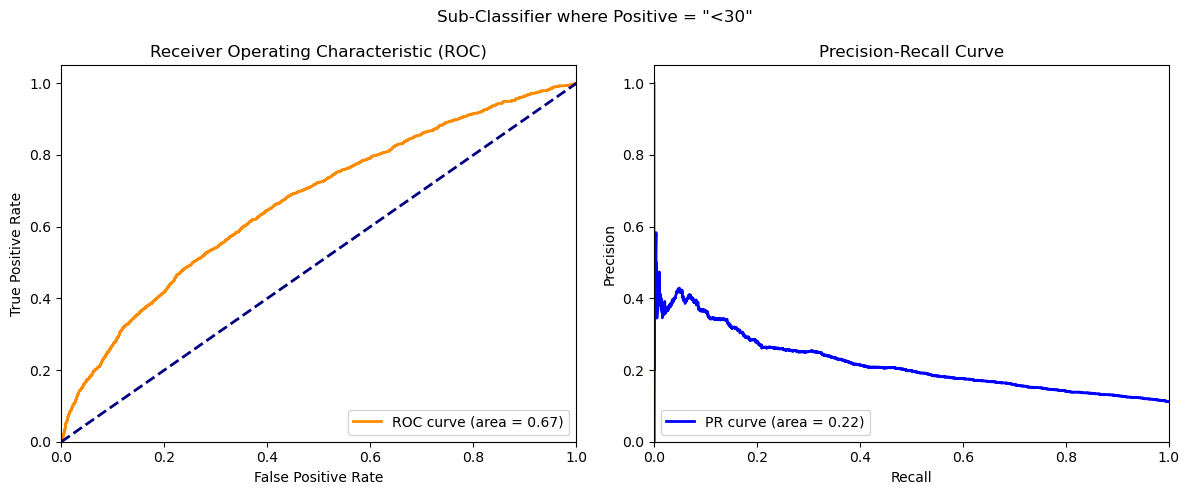

Positive = ">30"


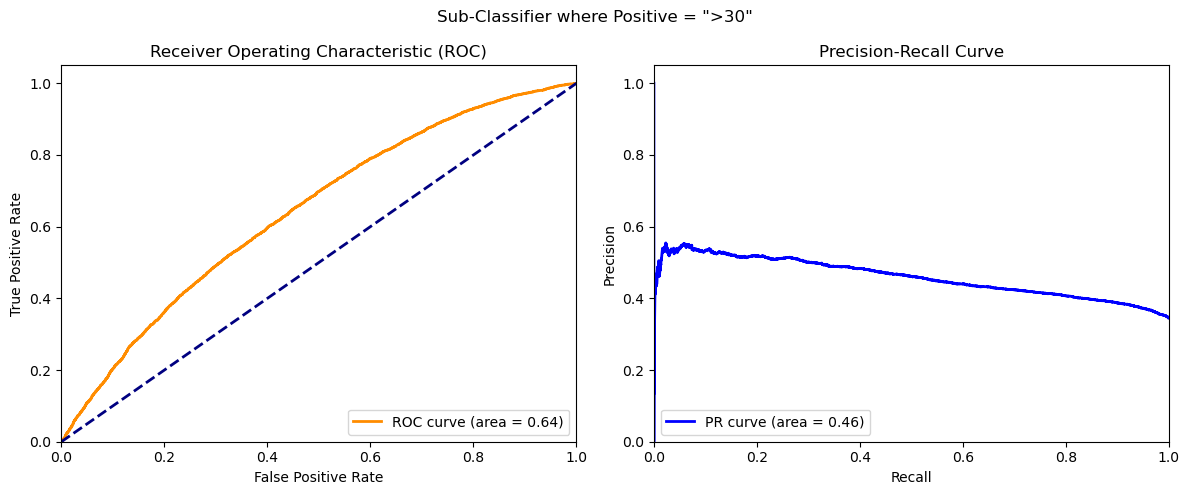

Positive = "NO"


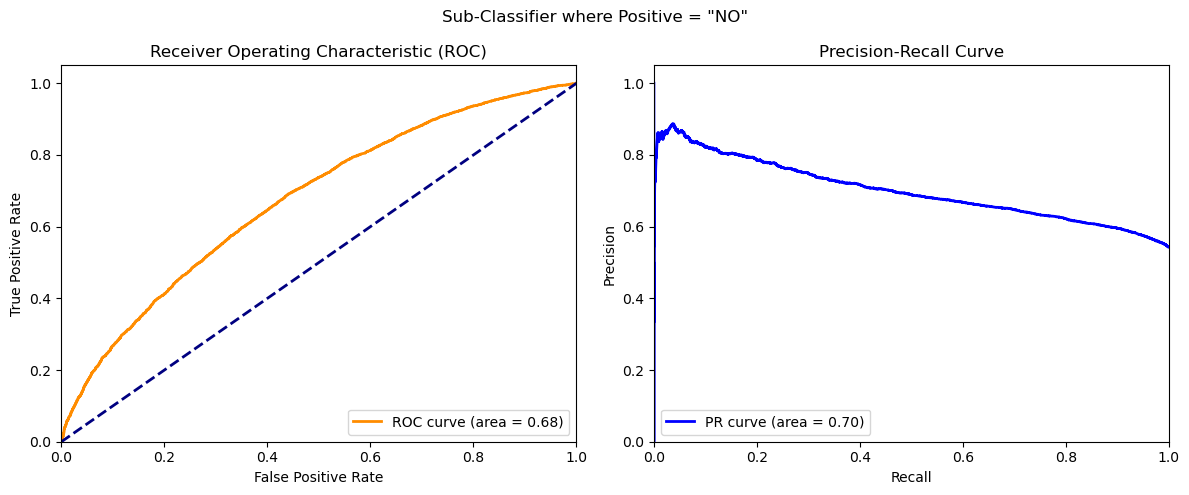

In [23]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
import numpy as np

testY_proba = test_y
y_pred_proba = model.predict(test.toarray())
    
def unit(a):
    # return a
    return np.divide(a, np.linalg.norm(a, axis=-1, keepdims=True))


for i, category_value in enumerate(one_hot_encoder_y.categories_[0]):

    print(f'Positive = "{category_value}"')

    y_pred = y_pred_proba[:,i]
    
    testY = testY_proba[:,i]
    
    fpr, tpr, _ = roc_curve(testY, y_pred, pos_label=1)
    precision, recall, _ = precision_recall_curve(testY, y_pred)
    roc_auc = auc(fpr, tpr)
    pr_auc = auc(recall, precision)
    
    fig, (roc, prc) = plt.subplots(1, 2, figsize=(12, 5))

    plt.suptitle(f'Sub-Classifier where Positive = "{category_value}"')
    
    roc.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    roc.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    roc.set_xlim([0.0, 1.0])
    roc.set_ylim([0.0, 1.05])
    roc.set_xlabel('False Positive Rate')
    roc.set_ylabel('True Positive Rate')
    roc.set_title('Receiver Operating Characteristic (ROC)')
    roc.legend(loc="lower right")
    
    prc.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
    prc.set_xlim([0.0, 1.0])
    prc.set_ylim([0.0, 1.05])
    prc.set_xlabel('Recall')
    prc.set_ylabel('Precision')
    prc.set_title('Precision-Recall Curve')
    prc.legend(loc="lower left")
    
    plt.tight_layout()
    plt.show()
